# GDP vs. Organized Crime Data Analysis

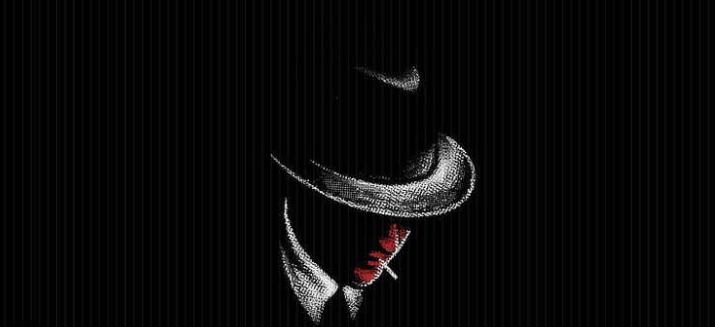

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set()

In [4]:
# Importing Dataset

In [8]:
df = pd.read_excel('gdp vs crime.xlsx')

# Exploratory Data Analysis

In [10]:
# Display the first few rows of the DataFrame to understand its structure
df.head()

,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,Unit,GDP Per Capita (US$),Code Value
0,Asia,Western Asia,Turkey,6.89,6.4,7.0,9.0,9.0,4.0,3.0,...,6.5,2.0,4.0,4.0,3.5,3.5,2021,US$,9661.23,TUR
1,Africa,West Africa,Cabo Verde,4.04,3.7,4.5,2.0,2.5,2.5,4.0,...,7.5,5.0,6.0,3.5,6.0,7.0,2021,US$,3293.23,CPV
2,Africa,Southern Africa,South Africa,6.63,6.0,4.5,4.0,8.0,3.5,7.5,...,6.0,6.0,6.0,4.0,5.0,7.0,2021,US$,7055.06,ZAF
3,South America,South America,Colombia,7.66,7.2,7.5,7.0,8.0,6.0,7.0,...,4.5,6.0,5.0,3.5,4.5,6.5,2021,US$,6104.14,COL
4,South America,South America,Peru,6.35,6.2,7.0,6.0,5.5,7.0,5.5,...,5.0,4.5,4.0,3.5,3.0,4.5,2021,US$,6621.65,PER


In [11]:
# Column Details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Continent                                   193 non-null    object 
 1   Region                                      193 non-null    object 
 2   Country                                     193 non-null    object 
 3   Criminality                                 193 non-null    float64
 4   Criminal markets                            193 non-null    float64
 5   Human trafficking                           193 non-null    float64
 6   Human smuggling                             193 non-null    float64
 7   Arms trafficking                            193 non-null    float64
 8   Flora crimes                                193 non-null    float64
 9   Fauna crimes                                193 non-null    float64
 10  Non-renewable 

In [12]:
# Row-Column
df.shape

(193, 37)

In [13]:
#Null check
df.isnull().sum()

Continent                                     0
Region                                        0
Country                                       0
Criminality                                   0
Criminal markets                              0
Human trafficking                             0
Human smuggling                               0
Arms trafficking                              0
Flora crimes                                  0
Fauna crimes                                  0
Non-renewable resource crimes                 0
Heroin trade                                  0
Cocaine trade                                 0
Cannabis trade                                0
Synthetic drug trade                          0
Criminal actors                               0
Mafia-style groups                            0
Criminal networks                             0
State-embedded actors                         0
Foreign actors                                0
Resilience                              

In [14]:
# Rename the column for easier access
df.rename(columns={'GDP Per Capita (US$)': 'GDP_per_capita'}, inplace=True)

In [15]:
#Statistical Overview
df.describe()

,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,Non-renewable resource crimes,Heroin trade,Cocaine trade,...,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors,Year,GDP_per_capita
count,193.000000,193.000000,193.000000,193.00000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.0,193.000000
mean,4.872383,4.650777,5.582902,4.76943,4.919689,3.878238,4.634715,4.505181,3.974093,4.523316,...,4.593264,4.911917,5.119171,4.683938,4.678756,4.238342,4.474093,4.878238,2021.0,16974.958756
std,1.326322,1.272582,1.679648,1.91416,2.105307,2.315469,1.921639,2.432950,2.060757,2.016398,...,1.831895,1.768507,1.846674,1.588074,1.827998,1.954610,1.804754,1.909255,0.0,28904.860019
min,1.540000,1.600000,1.500000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.0,301.590000
25%,4.000000,3.850000,4.500000,3.00000,3.000000,2.000000,3.500000,2.000000,2.000000,3.000000,...,3.000000,4.000000,4.000000,3.500000,3.500000,3.000000,3.000000,3.500000,2021.0,2081.800000
50%,4.900000,4.750000,5.500000,5.00000,5.000000,3.500000,4.500000,4.000000,4.000000,4.500000,...,4.500000,5.000000,5.000000,4.500000,4.500000,4.000000,4.500000,5.000000,2021.0,6104.140000
75%,5.890000,5.650000,7.000000,6.50000,6.500000,6.000000,6.000000,6.500000,5.500000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,5.500000,5.500000,6.000000,2021.0,17736.420000
max,7.750000,8.000000,9.500000,9.50000,9.500000,8.500000,9.000000,9.500000,9.500000,9.500000,...,9.000000,9.000000,9.500000,8.500000,9.000000,9.500000,9.500000,9.000000,2021.0,234317.080000


In [16]:
# Calculate the correlation coefficient
correlation = df['GDP_per_capita'].corr(df['Criminality'])
print("Correlation coefficient between GDP per capita and the overall organized crime index:", correlation)

Correlation coefficient between GDP per capita and the overall organized crime index: -0.3486143681276766


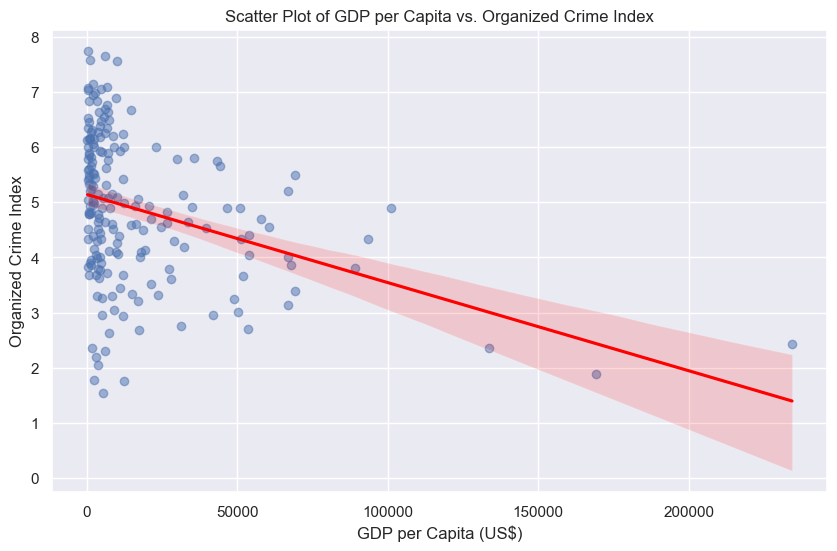

In [53]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['GDP_per_capita'], df['Criminality'], alpha=0.5)

# Add trend line
sns.regplot(data=df, x='GDP_per_capita', y='Criminality', scatter=False, color='red', label='Trendline')

plt.title('Scatter Plot of GDP per Capita vs. Organized Crime Index')
plt.xlabel('GDP per Capita (US$)')
plt.ylabel('Organized Crime Index')
plt.grid(True)
plt.show()

In [21]:
# Grouping data by 'Continent' to analyze regional differences
regional_group = df.groupby('Continent').agg({
    'GDP_per_capita': 'mean',
    'Criminality': 'mean'
}).reset_index()

In [22]:
# Select numerical columns for descriptive statistics
numerical_cols = df.select_dtypes(include=[np.number])
print("Descriptive Statistics for Numerical Data:")
print(numerical_cols.describe())

Descriptive Statistics for Numerical Data:
       Criminality  Criminal markets  Human trafficking  Human smuggling  \
count   193.000000        193.000000         193.000000        193.00000   
mean      4.872383          4.650777           5.582902          4.76943   
std       1.326322          1.272582           1.679648          1.91416   
min       1.540000          1.600000           1.500000          1.00000   
25%       4.000000          3.850000           4.500000          3.00000   
50%       4.900000          4.750000           5.500000          5.00000   
75%       5.890000          5.650000           7.000000          6.50000   
max       7.750000          8.000000           9.500000          9.50000   

       Arms trafficking  Flora crimes  Fauna crimes  \
count        193.000000    193.000000    193.000000   
mean           4.919689      3.878238      4.634715   
std            2.105307      2.315469      1.921639   
min            1.000000      1.000000      1.000000 

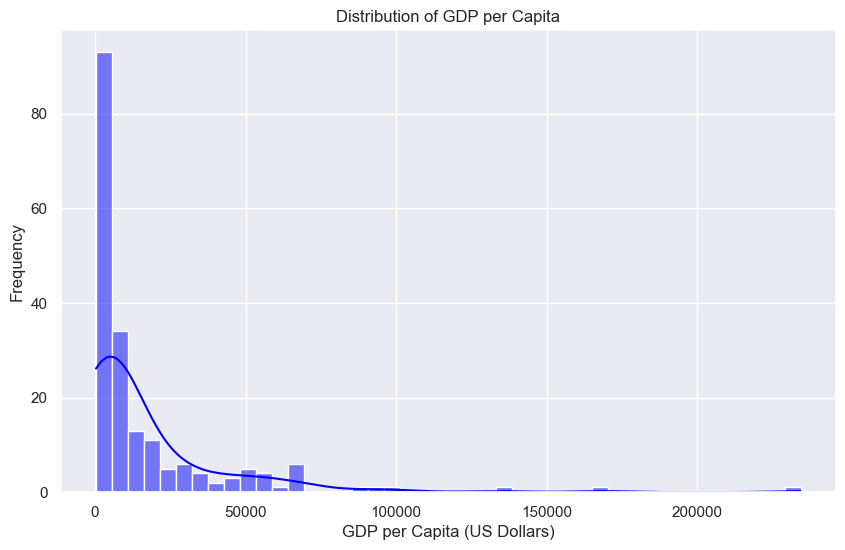

In [23]:
# Visualizing the distribution of GDP per Capita
plt.figure(figsize=(10, 6))
sns.histplot(df['GDP_per_capita'], kde=True, color='blue')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita (US Dollars)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

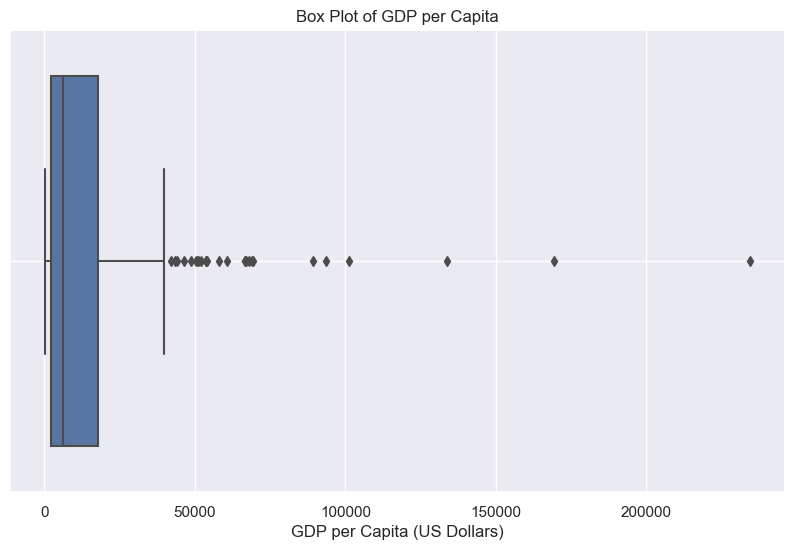

In [24]:
# Box plot for GDP per Capita to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GDP_per_capita'])
plt.title('Box Plot of GDP per Capita')
plt.xlabel('GDP per Capita (US Dollars)')
plt.grid(True)
plt.show()

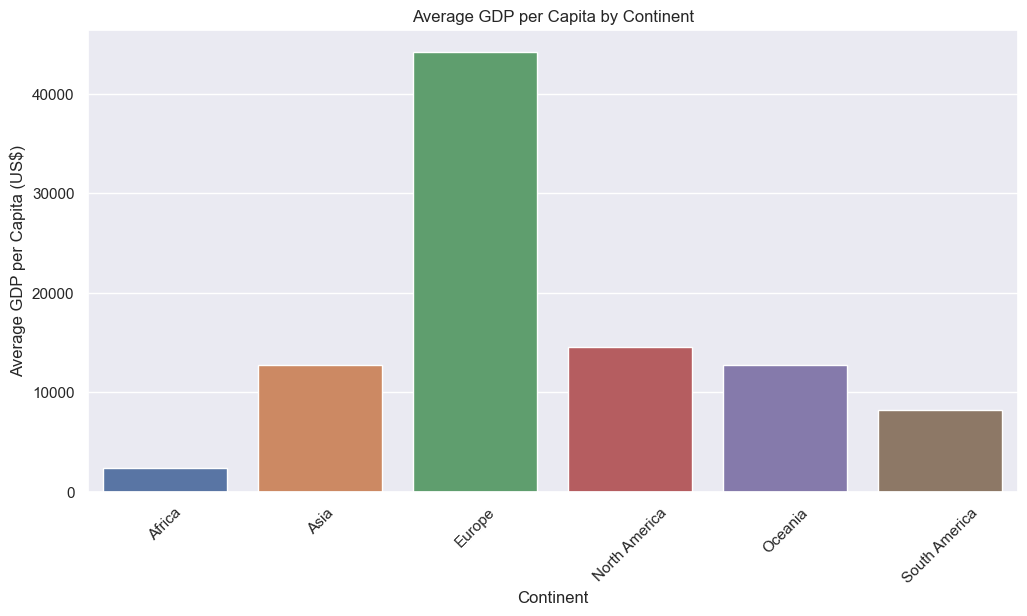

In [25]:
# Visualizing the average GDP per capita and Criminality by continent
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='GDP_per_capita', data=regional_group)
plt.title('Average GDP per Capita by Continent')
plt.ylabel('Average GDP per Capita (US$)')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()

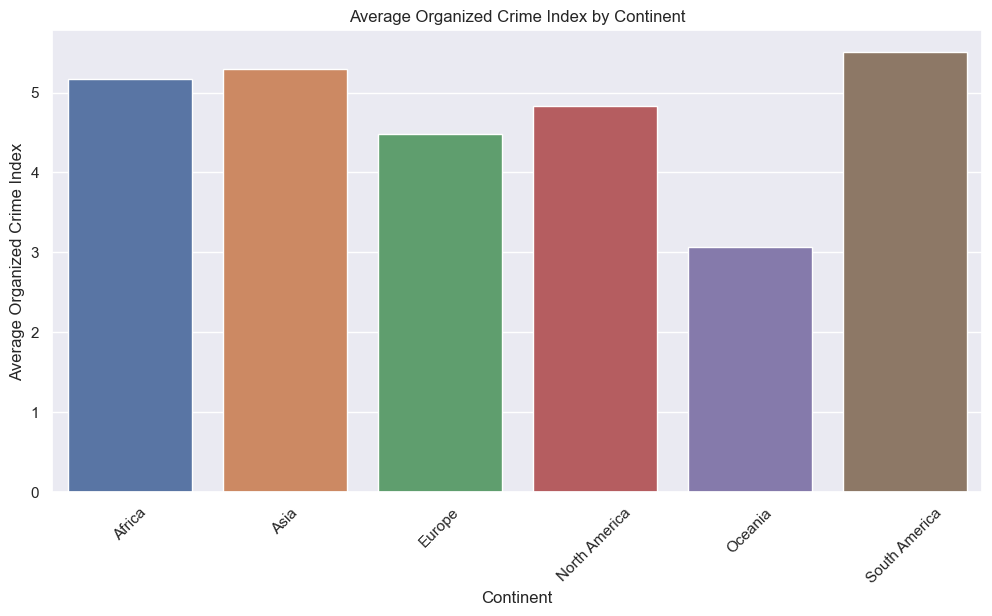

In [27]:
# Average Crime Index by Continent
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='Criminality', data=regional_group)
plt.title('Average Organized Crime Index by Continent')
plt.ylabel('Average Organized Crime Index')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Calculating correlation within each continent
continents = df['Continent'].unique()
for continent in continents:
    subset = df[df['Continent'] == continent]
    correlation = subset['GDP_per_capita'].corr(subset['Criminality'])
    print(f"Correlation between GDP per capita and organized crime in {continent}: {correlation:.2f}")

Correlation between GDP per capita and organized crime in Asia: -0.33
Correlation between GDP per capita and organized crime in Africa: -0.30
Correlation between GDP per capita and organized crime in South America: -0.64
Correlation between GDP per capita and organized crime in North America: -0.18
Correlation between GDP per capita and organized crime in Europe: -0.65
Correlation between GDP per capita and organized crime in Oceania: 0.17


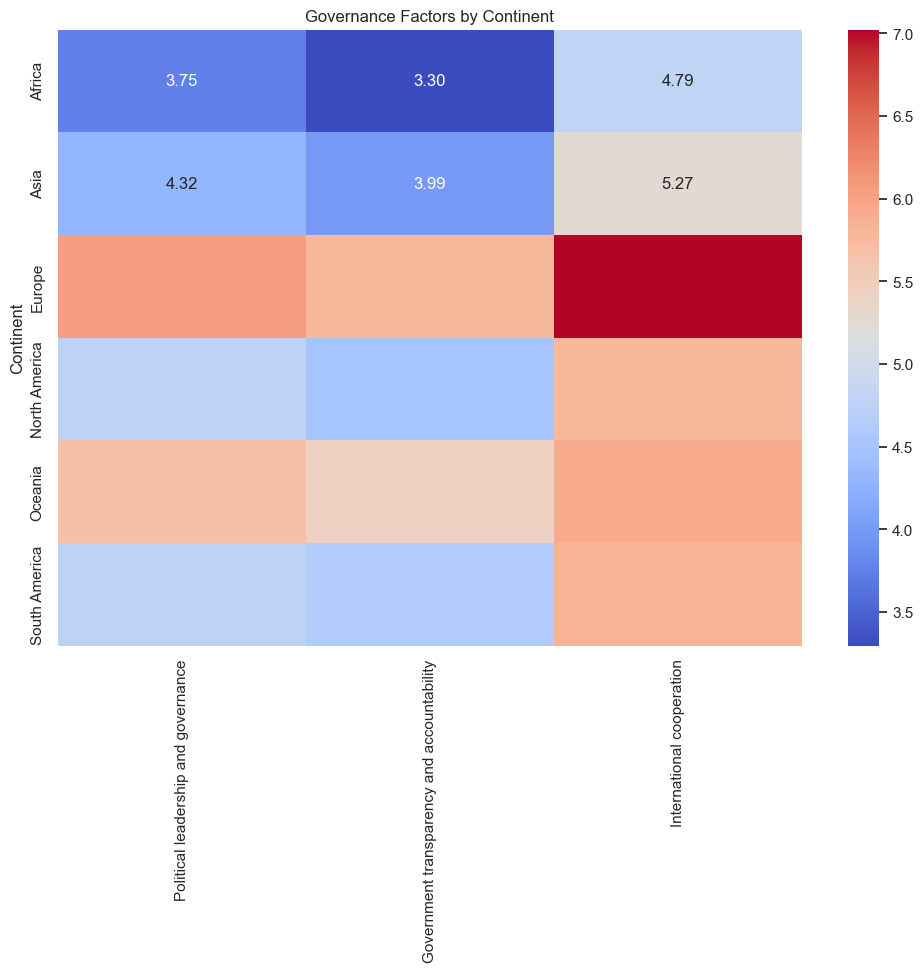

In [29]:
# Exploring governance factors by continent
governance_factors = ['Political leadership and governance', 'Government transparency and accountability', 'International cooperation']
continent_governance = df.groupby('Continent')[governance_factors].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.heatmap(continent_governance.set_index('Continent'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Governance Factors by Continent')
plt.show()

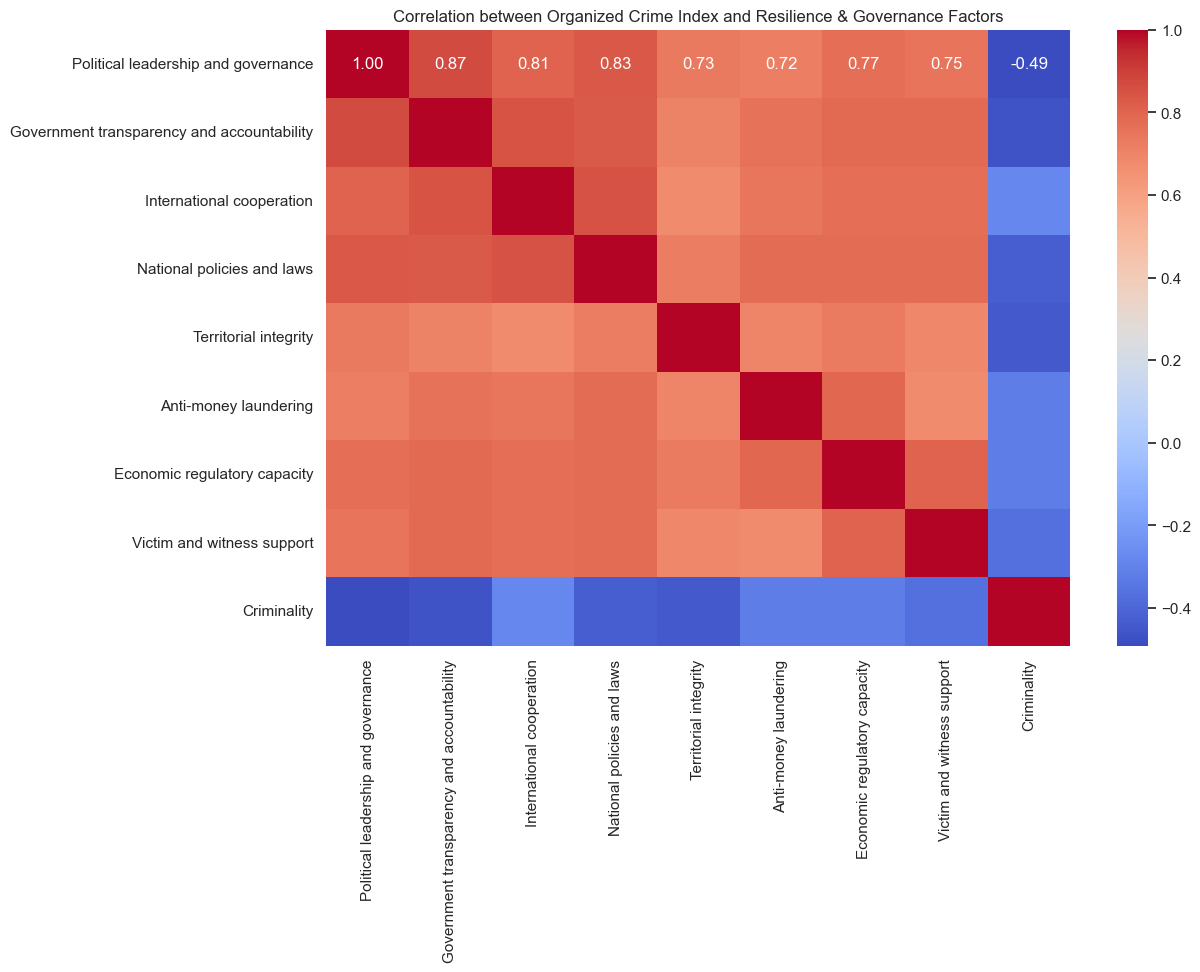

Correlation coefficients between organized crime index and resilience & governance factors:
International cooperation                    -0.286804
Anti-money laundering                        -0.319440
Economic regulatory capacity                 -0.320645
Victim and witness support                   -0.367162
National policies and laws                   -0.432648
Territorial integrity                        -0.441328
Government transparency and accountability   -0.467097
Political leadership and governance          -0.490887
Name: Criminality, dtype: float64


In [30]:
# Correctly select columns related to resilience and governance factors
resilience_governance_columns = df.columns[df.columns.str.contains('leadership|transparency|cooperation|policies|judicial|law enforcement|territorial|integrity|money laundering|regulatory|support|prevention')]

# Filter the DataFrame to include only numeric columns for correlation calculation
numeric_df = df[resilience_governance_columns].select_dtypes(include=[np.number])

# Calculate the correlation matrix for resilience and governance factors with the organized crime index
correlation_matrix = numeric_df.join(df['Criminality']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Organized Crime Index and Resilience & Governance Factors')
plt.show()

# Analyze the impact of resilience and governance factors on organized crime
print("Correlation coefficients between organized crime index and resilience & governance factors:")
print(correlation_matrix['Criminality'].drop('Criminality').sort_values(ascending=False))


In [39]:
import plotly.express as px

# Create a choropleth map
fig = px.choropleth(df, locations='Country', color='Criminality', scope='world')
fig.show()

In [54]:
df['Year'].value_counts()

Year
2021    193
Name: count, dtype: int64

In [42]:
# Create a line chart
fig3 = px.line(df, x='Year', y='Criminality')
fig3.show()

In [43]:
# Create a bar chart
fig4 = px.bar(df, x='Criminal markets', y='Criminality')
fig4.show()


In [44]:
# Create a heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
fig5 = px.imshow(numeric_df.corr())
fig5.show()

In [51]:
# Create a pie chart
fig6 = px.pie(df, values='Criminality', names='Continent')
fig6.show()

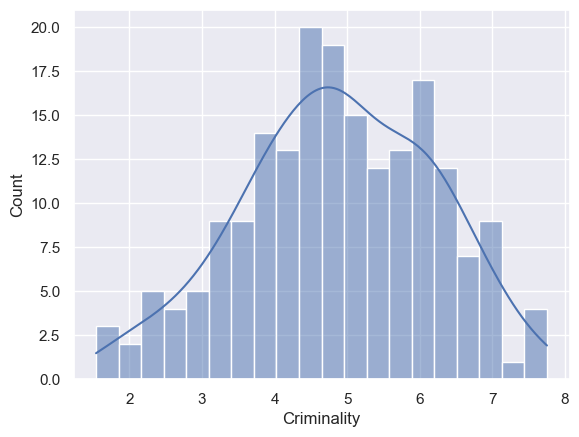

In [50]:
# Create a histogram
sns.histplot(x = 'Criminality', data = df, bins = 20, kde = True)
plt.show()

In [47]:
# Create a box plot
fig8 = px.box(df, y='Criminality', x='Region')
fig8.show()

In [55]:
# Countries with highest GDP Per capita

In [63]:
df1 = df[['Country', 'GDP_per_capita']].sort_values(by = 'GDP_per_capita', ascending= False).head(10)
df1

,Country,GDP_per_capita
114,Monaco,234317.08
87,Liechtenstein,169260.22
90,Luxembourg,133745.40
43,Ireland,101108.99
37,Switzerland,93525.37
120,Norway,89241.71
91,United States,69184.70
134,Iceland,69133.13
127,Denmark,68036.72
152,Australia,66915.86


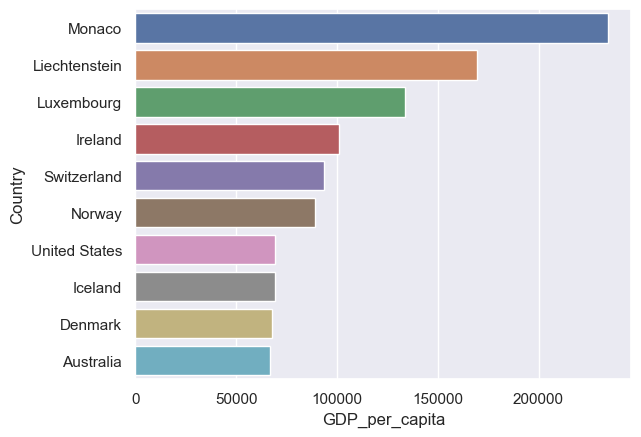

In [65]:
sns.barplot(x = 'GDP_per_capita', y = 'Country', data = df1)
plt.show()

In [66]:
# Distribution of Criminality

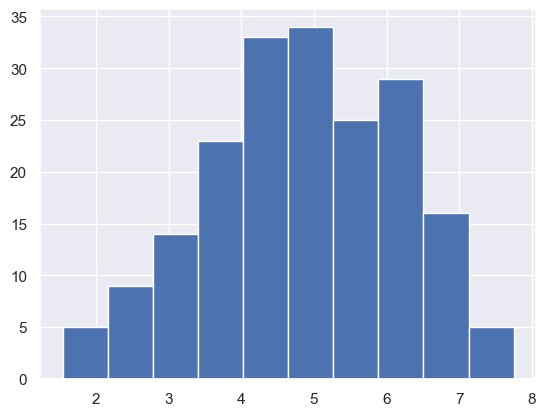

In [68]:
df['Criminality'].hist()
plt.show()

In [80]:
# Countries with Highest Criminality 

In [72]:
df2 = df[['Country', 'Criminality']].sort_values(by = 'Criminality', ascending= False).head(10)
df2

,Country,Criminality
151,"Congo, Dem. Rep.",7.75
3,Colombia,7.66
46,Myanmar,7.59
26,Mexico,7.56
15,Nigeria,7.15
10,Iran,7.10
22,Afghanistan,7.08
5,Iraq,7.05
181,Central African Republic,7.04
80,Honduras,6.98


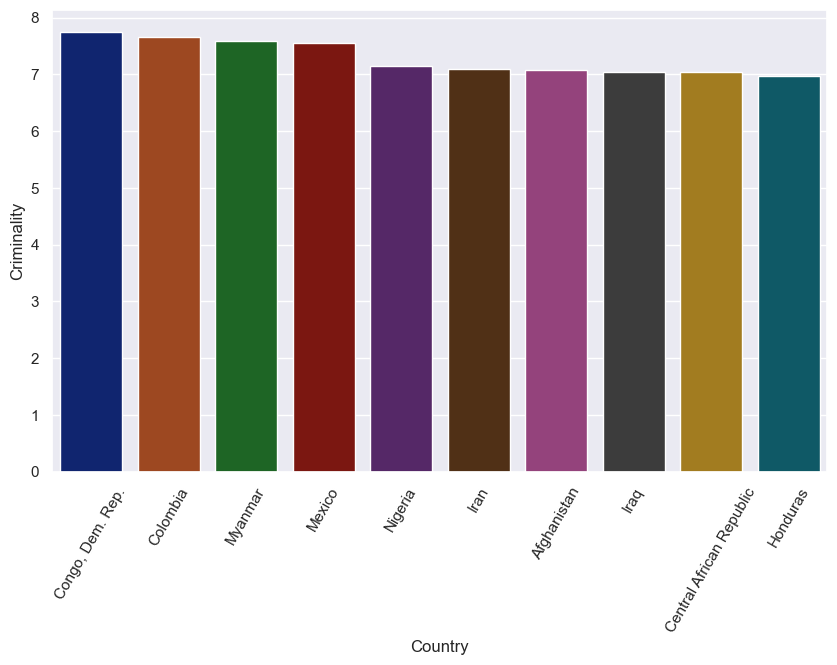

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Country', y = 'Criminality', data = df2, palette = 'dark')
plt.xticks(rotation = 60)
plt.show()